<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-2-Kaggle-Challenge/blob/master/DS7_Sprint_Challenge_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

  Using cached https://files.pythonhosted.org/packages/6e/a1/f7a22f144f33be78afeb06bfa78478e8284a64263a3c09b1ef54e673841e/category_encoders-2.0.0-py2.py3-none-any.whl


In [0]:
import pandas as pd

# Read data
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

**1. Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is your baseline accuracy, if you guessed the majority class for every prediction?

**2. Hold out your test set.** Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

**3. Engineer new feature.** Engineer at least **1** new feature, from this list, or your own idea.
- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**4. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**5.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**6.** Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.) 

**7.** Get your model's **test accuracy.** (One time, at the end.)


**8.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

### Stretch Goals
- Engineer 4+ new features total, either from the list above, or your own ideas.
- Make 2+ visualizations to explore relationships between features and target.
- Optimize 3+ hyperparameters by trying 10+ "candidates" (possible combinations of hyperparameters). You can use `RandomizedSearchCV` or do it manually.
- Get and plot your model's feature importances.



In [0]:
# !pip install pandas-profiling

In [0]:
# import pandas_profiling

# df.profile_report(style={'full_width': True})

## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [5]:
y_train = df.shot_made_flag
y_train.value_counts(normalize=True)

0    0.527081
1    0.472919
Name: shot_made_flag, dtype: float64

In [6]:
majority_class = y_train.mode()[0]
majority_class

0

In [7]:
y_pred = [majority_class] * len(y_train)
len(y_pred)

13958

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5270812437311936

In [0]:
# Starting out from 52% baseline accuracy and the goal is 60%+, not bad!

## 2. Hold out your test set.

>Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

In [10]:
df.describe()

game_id  game_event_id  ...  shot_made_flag  scoremargin_before_shot
count  1.395800e+04   13958.000000  ...    13958.000000             13958.000000
mean   2.442837e+07     270.438458  ...        0.472919                 1.615561
std    7.226620e+06     169.927170  ...        0.499284                10.127139
min    2.090002e+07       2.000000  ...        0.000000               -39.000000
25%    2.120091e+07     109.000000  ...        0.000000                -4.000000
50%    2.150026e+07     275.500000  ...        0.000000                 1.000000
75%    2.170096e+07     398.000000  ...        1.000000                 8.000000
max    4.180040e+07     752.000000  ...        1.000000                43.000000

[8 rows x 10 columns]

In [11]:
df.describe(exclude="number")

player_name action_type       shot_type  ...    htm    vtm     season_type
count           13958       13958           13958  ...  13958  13958           13958
unique              1          53               2  ...     32     32               2
top     Stephen Curry   Jump Shot  2PT Field Goal  ...    GSW    GSW  Regular Season
freq            13958        6657            7135  ...   6871   7087           11846

[4 rows x 10 columns]

In [12]:
df.game_date.describe()

count          13958
unique           801
top       2013-05-06
freq              35
Name: game_date, dtype: object

In [0]:
df['game_date'] = pd.to_datetime(df['game_date'], infer_datetime_format=True)

In [14]:
df.game_date.describe()

count                   13958
unique                    801
top       2013-05-06 00:00:00
freq                       35
first     2009-10-28 00:00:00
last      2019-06-05 00:00:00
Name: game_date, dtype: object

In [15]:
df[(df.game_date >= 'October 2018') & (df.game_date <= 'July 2019')].game_date

12249   2018-10-16
12250   2018-10-16
12251   2018-10-16
12252   2018-10-16
12253   2018-10-16
12254   2018-10-16
12255   2018-10-16
12256   2018-10-16
12257   2018-10-16
12258   2018-10-16
12259   2018-10-16
12260   2018-10-16
12261   2018-10-16
12262   2018-10-16
12263   2018-10-16
12264   2018-10-16
12265   2018-10-16
12266   2018-10-16
12267   2018-10-16
12268   2018-10-16
12269   2018-10-19
12270   2018-10-19
12271   2018-10-19
12272   2018-10-19
12273   2018-10-19
12274   2018-10-19
12275   2018-10-19
12276   2018-10-19
12277   2018-10-19
12278   2018-10-19
           ...    
13928   2019-06-05
13929   2019-06-05
13930   2019-06-05
13931   2019-06-05
13932   2019-06-05
13933   2019-06-05
13934   2019-06-05
13935   2019-06-05
13936   2019-06-05
13937   2019-06-05
13938   2019-06-05
13939   2019-06-05
13940   2019-06-05
13941   2019-06-05
13942   2019-06-05
13943   2019-06-05
13944   2019-06-05
13945   2019-06-05
13946   2019-06-05
13947   2019-06-05
13948   2019-06-05
13949   2019

In [16]:
df[(df.game_date < 'October 2018')].game_date

0       2009-10-28
1       2009-10-28
2       2009-10-28
3       2009-10-28
4       2009-10-28
5       2009-10-28
6       2009-10-28
7       2009-10-28
8       2009-10-28
9       2009-10-28
10      2009-10-28
11      2009-10-28
12      2009-10-30
13      2009-10-30
14      2009-10-30
15      2009-10-30
16      2009-10-30
17      2009-10-30
18      2009-10-30
19      2009-10-30
20      2009-10-30
21      2009-11-04
22      2009-11-04
23      2009-11-04
24      2009-11-04
25      2009-11-04
26      2009-11-04
27      2009-11-06
28      2009-11-06
29      2009-11-06
           ...    
12219   2018-06-06
12220   2018-06-06
12221   2018-06-06
12222   2018-06-08
12223   2018-06-08
12224   2018-06-08
12225   2018-06-08
12226   2018-06-08
12227   2018-06-08
12228   2018-06-08
12229   2018-06-08
12230   2018-06-08
12231   2018-06-08
12232   2018-06-08
12233   2018-06-08
12234   2018-06-08
12235   2018-06-08
12236   2018-06-08
12237   2018-06-08
12238   2018-06-08
12239   2018-06-08
12240   2018

In [17]:
test = df[(df.game_date >= 'October 2018') & (df.game_date <= 'July 2019')]
test.shape

(1709, 20)

In [18]:
train = df[df.game_date < 'October 2018']
train.shape

(12249, 20)

In [0]:
assert len(test) + len(train) == len(df)

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [20]:
df.columns.to_list()

['game_id',
 'game_event_id',
 'player_name',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'action_type',
 'shot_type',
 'shot_zone_basic',
 'shot_zone_area',
 'shot_zone_range',
 'shot_distance',
 'loc_x',
 'loc_y',
 'shot_made_flag',
 'game_date',
 'htm',
 'vtm',
 'season_type',
 'scoremargin_before_shot']

In [0]:
def feature_engineer(X):
    """Takes in dataframe and engineers the following features."""
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    #Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?
    X['homecourt_advantage'] = X.htm == 'GSW'
        
    # Extract components from date_recorded, then drop the original column
    X['game_year'] = X['game_date'].dt.year
    X['game_month'] = X['game_date'].dt.month
    X['game_day'] = X['game_date'].dt.day
    
    # In North American sports, "running up the score" occurs when 
    # a team continues to play in such a way as to score additional points 
    # after the outcome of the game is no longer in question and the team is 
    # assured of winning. In the United States and Canada, it is considered 
    # poor sportsmanship to "run up the score" in most circumstances 
    X['running_up_score'] = X.scoremargin_before_shot > 50
    
    # Home team is losing
    X['losing'] = X.scoremargin_before_shot < 0
    
    # Score is currently tied
    X['tied'] = X.scoremargin_before_shot == 0
    
    # return the wrangled dataframe
    return X

In [0]:
train = feature_engineer(train)
test = feature_engineer(test)

In [23]:
train.head()

game_id  game_event_id    player_name  ...  running_up_score  losing   tied
0  20900015              4  Stephen Curry  ...             False   False  False
1  20900015             17  Stephen Curry  ...             False   False   True
2  20900015             53  Stephen Curry  ...             False    True  False
3  20900015            141  Stephen Curry  ...             False    True  False
4  20900015            249  Stephen Curry  ...             False   False   True

[5 rows x 27 columns]

## **4. Decide how to validate** your model. 

>Choose one of the following options. Any of these options are good. You are not graded on which you choose.
>
>- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
>- **Train/validate/test split: random 80/20%** train/validate split.
>- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

In [24]:
# X = X.drop(columns='game_date')
# train = train[(train.game_year <) ]
train_subset = train[(train.game_date >= 'October 2009') & (train.game_date <= 'July 2017')]
train.game_date

0       2009-10-28
1       2009-10-28
2       2009-10-28
3       2009-10-28
4       2009-10-28
5       2009-10-28
6       2009-10-28
7       2009-10-28
8       2009-10-28
9       2009-10-28
10      2009-10-28
11      2009-10-28
12      2009-10-30
13      2009-10-30
14      2009-10-30
15      2009-10-30
16      2009-10-30
17      2009-10-30
18      2009-10-30
19      2009-10-30
20      2009-10-30
21      2009-11-04
22      2009-11-04
23      2009-11-04
24      2009-11-04
25      2009-11-04
26      2009-11-04
27      2009-11-06
28      2009-11-06
29      2009-11-06
           ...    
12219   2018-06-06
12220   2018-06-06
12221   2018-06-06
12222   2018-06-08
12223   2018-06-08
12224   2018-06-08
12225   2018-06-08
12226   2018-06-08
12227   2018-06-08
12228   2018-06-08
12229   2018-06-08
12230   2018-06-08
12231   2018-06-08
12232   2018-06-08
12233   2018-06-08
12234   2018-06-08
12235   2018-06-08
12236   2018-06-08
12237   2018-06-08
12238   2018-06-08
12239   2018-06-08
12240   2018

In [25]:
val = train[(train.game_date >= 'October 2017') & (train.game_date <= 'July 2018')]
val.game_date

11081   2017-10-17
11082   2017-10-17
11083   2017-10-17
11084   2017-10-17
11085   2017-10-17
11086   2017-10-17
11087   2017-10-17
11088   2017-10-17
11089   2017-10-17
11090   2017-10-17
11091   2017-10-17
11092   2017-10-17
11093   2017-10-17
11094   2017-10-17
11095   2017-10-17
11096   2017-10-17
11097   2017-10-17
11098   2017-10-17
11099   2017-10-20
11100   2017-10-20
11101   2017-10-20
11102   2017-10-20
11103   2017-10-20
11104   2017-10-20
11105   2017-10-20
11106   2017-10-20
11107   2017-10-20
11108   2017-10-20
11109   2017-10-20
11110   2017-10-20
           ...    
12219   2018-06-06
12220   2018-06-06
12221   2018-06-06
12222   2018-06-08
12223   2018-06-08
12224   2018-06-08
12225   2018-06-08
12226   2018-06-08
12227   2018-06-08
12228   2018-06-08
12229   2018-06-08
12230   2018-06-08
12231   2018-06-08
12232   2018-06-08
12233   2018-06-08
12234   2018-06-08
12235   2018-06-08
12236   2018-06-08
12237   2018-06-08
12238   2018-06-08
12239   2018-06-08
12240   2018

In [26]:
test.game_date

12249   2018-10-16
12250   2018-10-16
12251   2018-10-16
12252   2018-10-16
12253   2018-10-16
12254   2018-10-16
12255   2018-10-16
12256   2018-10-16
12257   2018-10-16
12258   2018-10-16
12259   2018-10-16
12260   2018-10-16
12261   2018-10-16
12262   2018-10-16
12263   2018-10-16
12264   2018-10-16
12265   2018-10-16
12266   2018-10-16
12267   2018-10-16
12268   2018-10-16
12269   2018-10-19
12270   2018-10-19
12271   2018-10-19
12272   2018-10-19
12273   2018-10-19
12274   2018-10-19
12275   2018-10-19
12276   2018-10-19
12277   2018-10-19
12278   2018-10-19
           ...    
13928   2019-06-05
13929   2019-06-05
13930   2019-06-05
13931   2019-06-05
13932   2019-06-05
13933   2019-06-05
13934   2019-06-05
13935   2019-06-05
13936   2019-06-05
13937   2019-06-05
13938   2019-06-05
13939   2019-06-05
13940   2019-06-05
13941   2019-06-05
13942   2019-06-05
13943   2019-06-05
13944   2019-06-05
13945   2019-06-05
13946   2019-06-05
13947   2019-06-05
13948   2019-06-05
13949   2019

In [0]:
assert len(train_subset) + len(val) + len(test) == len(df)

## 5. Use a scikit-learn pipeline to encode categoricals and fit a Decision Tree or Random Forest model.

In [0]:
target = 'shot_made_flag'
datetime = 'game_date'

X_train = train_subset.drop(columns=[target, datetime])
X_val = val.drop(columns=[target, datetime])
X_test = test.drop(columns=[target, datetime])

y_train = train_subset[target]
y_val = val[target]
y_test = test[target]

In [0]:
assert len(X_train) + len(X_val) + len(X_test) == len(df)

In [0]:
assert len(y_train) + len(y_val) + len(y_test) == len(df[target])

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

## 6.Get your model's validation accuracy

> (Multiple times if you try multiple iterations.)

In [32]:
pipeline.fit(X_train, y_train);
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5976027397260274


### 6.4 Explore and wrangle

In [33]:
!pip install pandas-profiling

In [34]:
import pandas_profiling

X_train.profile_report(style={'full_width':True})

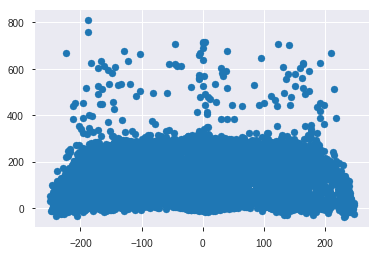

In [35]:
# Are the zeros for loc x and loc y normal?
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.loc_x, df.loc_y)

In [0]:
def wrangle(X):
    """Accepts dataframe and returns wrangled dataframe."""
    X = X.copy()   
    
    # Drop player_name (never varies) 
    unusable_variance = ['player_name']
    X = X.drop(columns=unusable_variance)
    
    # Drop highly correlated columns
    highly_correlated = ['period']
    X = X.drop(columns=highly_correlated)
        
    return X

In [0]:
X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test = wrangle(X_test)

In [0]:
assert len(X_train) + len(X_val) + len(X_test) == len(df)

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

In [40]:
pipeline.fit(X_train, y_train);
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6018835616438356


### 6.5 Tune the hyperparameters

In [41]:
import numpy as np

param_distributions = {
    'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 3)], 
    'randomforestclassifier__max_depth': [5, 15, 30, 50, None], 
    'randomforestclassifier__max_features': [0.1, 0.5, 1, 'auto', 'sqrt'], 
    'randomforestclassifier__min_samples_leaf': [1, 4, 8],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

print(param_distributions)

{'randomforestclassifier__n_estimators': [10, 105, 200], 'randomforestclassifier__max_depth': [5, 15, 30, 50, None], 'randomforestclassifier__max_features': [0.1, 0.5, 1, 'auto', 'sqrt'], 'randomforestclassifier__min_samples_leaf': [1, 4, 8], 'randomforestclassifier__min_samples_split': [2, 5, 10]}


In [0]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [43]:
search.fit(X_train, y_train);
print('Validation Accuracy', search.score(X_val, y_val))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Validation Accuracy 0.613013698630137


In [44]:
search.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 0.5,
 'randomforestclassifier__min_samples_leaf': 8,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 200}

## 7. Get your model's test accuracy

> (One time, at the end.)

In [0]:
y_pred = search.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6196606202457577


In [99]:
search.best_estimator_[2].feature_importances_

array([2.19934046e-02, 1.38849374e-02, 1.35447977e-02, 8.54567994e-03,
       6.08441993e-01, 2.03254169e-03, 1.66670145e-02, 3.60316439e-03,
       3.54619427e-02, 9.27105503e-02, 1.99524013e-02, 5.15626635e-02,
       3.10133097e-02, 2.27383943e-02, 9.08581441e-04, 6.46833977e-03,
       2.88989945e-02, 6.31967702e-03, 5.98132659e-03, 8.53229502e-03,
       0.00000000e+00, 4.18118003e-04, 3.19872608e-04])

In [103]:
X_train.columns

Index(['game_id', 'game_event_id', 'minutes_remaining', 'seconds_remaining',
       'action_type', 'shot_type', 'shot_zone_basic', 'shot_zone_area',
       'shot_zone_range', 'shot_distance', 'loc_x', 'loc_y', 'htm', 'vtm',
       'season_type', 'scoremargin_before_shot', 'homecourt_advantage',
       'game_year', 'game_month', 'game_day', 'running_up_score', 'losing',
       'tied'],
      dtype='object')

In [107]:
feature_importances = pd.DataFrame(search.best_estimator_[2].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

importance
action_type                0.608442
shot_distance              0.092711
loc_y                      0.051563
shot_zone_range            0.035462
htm                        0.031013
homecourt_advantage        0.028899
vtm                        0.022738
game_id                    0.021993
loc_x                      0.019952
shot_zone_basic            0.016667
game_event_id              0.013885
minutes_remaining          0.013545
seconds_remaining          0.008546
game_day                   0.008532
scoremargin_before_shot    0.006468
game_year                  0.006320
game_month                 0.005981
shot_zone_area             0.003603
shot_type                  0.002033
season_type                0.000909
losing                     0.000418
tied                       0.000320
running_up_score           0.000000

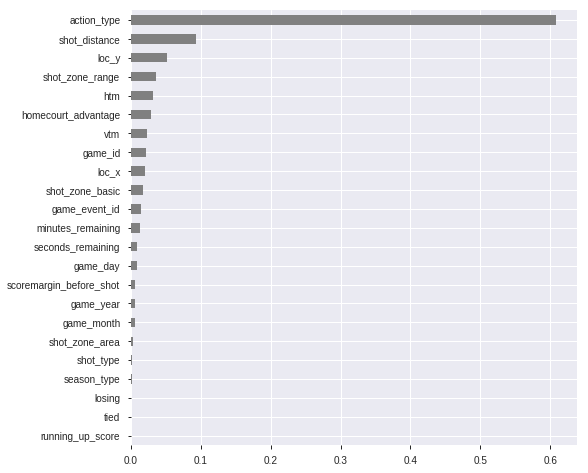

In [110]:
plt.figure(figsize=(8,8))
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

## 8. Given a confusion matrix, calculate accuracy, precision, and recall.

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

### Calculate accuracy 

In [0]:
correct_predictions = 85 + 36
correct_predictions

In [0]:
# Very nice! Already hit MVP

In [0]:
total_predictions = 85 + 36 + 58 + 8
total_predictions

In [0]:
accuracy = correct_predictions / total_predictions
accuracy

### Calculate precision

In [0]:
correct_predictions_positive = 36
total_predictions_positive = 36 + 58

In [0]:
positive_precision = correct_predictions_positive / total_predictions_positive
positive_precision

In [0]:
correct_predictions_negative = 85
total_predictions_negative = 85 + 8

In [0]:
negative_precision = correct_predictions_negative / total_predictions_negative
negative_precision

### Calculate recall

In [0]:
actual_positive = 8 + 36

In [0]:
positive_recall = correct_predictions_positive / actual_positive
positive_recall

In [0]:
actual_negative = 85 + 58

In [0]:
negative_recall = correct_predictions_negative / actual_negative
negative_recall

## 9. Get and Interpret Confusion Matrix

In [0]:
# This was a matplotlib regression introduced in 3.1.1 which has been 
# fixed in 3.1.2 (still forthcoming). For now the fix is to downgrade 
# matplotlib to a prior version.

!pip install matplotlib==3.0.3
import matplotlib
print(matplotlib.__version__)

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# confusion_matrix(y_val, y_pred)
# unique_labels(y_pred)

# 1. Create correct labels.

def plot_confusion_matrix(y_true, y_pred):
  labels = unique_labels(y_pred)
  columns = [f'Predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]

  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
  
  return sns.heatmap(table, annot=True, fmt='d')
  
plot_confusion_matrix(y_test, y_pred);


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))